In [2]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt

### Activation Functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))


def elu(z, alpha: float):
    return alpha * (np.exp(z) - 1) if z < 0 else z

### Trial Solution

In [4]:
def trial_solution(
    input: np.array, parameters: list, initial_conditions: np.array
) -> np.array:
    return initial_conditions[0] + input * forward_propogation(input, parameters)

def right_hand_side(
    input: np.array, trial_sol: np.array, constants: np.array
) -> np.array:
    return np.array(
        [
            constants[0] * trial_sol[0]
        ]
    )

### Loss Function

In [5]:
def MSE_loss_function(
    input, parameters: list, constants: np.array, initial_conditions: np.array
):
    trial_sol = trial_solution(input, parameters, initial_conditions)
    prediction = right_hand_side(input, trial_sol, constants)
    neural_network_gradient = elementwise_grad(trial_solution, 0)(
        input, parameters, initial_conditions
    )

    error_squared = (neural_network_gradient - prediction) ** 2
    loss_sum_mean = np.sum(error_squared / np.shape(error_squared)[1])

    return loss_sum_mean

### Neural Network

![](NN.png "Neural Network")

In [6]:
def init_parameters(input_size: int, hidden_sizes: np.array, output_size: int):
    parameters = [None] * (hidden_sizes.shape[0] + 1) # +1 for the output

    # hidden weights and biases
    parameters[0] = np.random.randn(hidden_sizes[0], input_size + 1) # +1 for the bias
    for i in range(1, hidden_sizes.shape[0]):
        parameters[i] = np.random.randn(hidden_sizes[i], hidden_sizes[i - 1] + 1) # +1 for the bias

    # output weights and biases
    parameters[-1] = np.random.randn(output_size, hidden_sizes[-1] + 1) # +1 for the bias

    return parameters

In [7]:
def forward_propogation(input: np.array, parameters: list):
    num_hidden_layers = len(parameters) - 1
    num_inputs = input.size
    input = input.reshape(-1, input.size)

    # hidden layers
    z = np.matmul(parameters[0], np.concatenate((np.ones((1, num_inputs)), input), axis = 0))
    a = sigmoid(z)
    for i in range(1, num_hidden_layers):
        z = np.matmul(parameters[i], np.concatenate((np.ones((1, num_inputs)), a), axis = 0))
        a = sigmoid(z)

    # output layer
    z = np.matmul(parameters[-1], np.concatenate((np.ones((1, num_inputs)), a), axis = 0))
    
    return z

In [8]:
def gradient_descent(
    input: np.array,
    parameters: list,
    constants: np.array,
    initial_conditions: np.array,
    num_iter: int,
    learn_rate: float,
):
    loss_grad_function = grad(MSE_loss_function, 1)

    for i in range(num_iter):
        print(MSE_loss_function(input, parameters, constants, initial_conditions))
        loss_grad = loss_grad_function(input, parameters, constants, initial_conditions)
        # hidden layers
        for j in range(len(parameters)):
            parameters[j] = parameters[j] - learn_rate * loss_grad[j]

    return parameters

In [9]:
def adam(input, parameters, constants, initial_conditions, grad, num_iters=10000,
         step_size=0.1, b1=0.9, b2=0.999, eps=10**-8):
    m = [np.zeros_like(parameters[i]) for i in range(len(parameters))]
    v = [np.zeros_like(parameters[i]) for i in range(len(parameters))]
    mhat = [None] * len(parameters)
    vhat = [None] * len(parameters)
    for i in range(num_iters):
        g = grad(input, parameters, constants, initial_conditions)
        print("iteration: ", i)
        print(MSE_loss_function(input, parameters, constants, initial_conditions))
        
        for j in range(len(parameters)):
            m[j] = (1 - b1) * g[j]      + b1 * m[j]  # First  moment estimate.
            v[j] = (1 - b2) * (g[j]**2) + b2 * v[j]  # Second moment estimate.
            mhat[j] = m[j] / (1 - b1**(i + 1))    # Bias correction.
            vhat[j] = v[j] / (1 - b2**(i + 1))
            parameters[j] = parameters[j] - step_size * mhat[j]/(np.sqrt(vhat[j]) + eps)
    
    return parameters

In [35]:
t = np.arange(0, 10, 0.01)
constants = np.array([2])
initial_conditions = np.array([10])
parameters = init_parameters(1, np.array([10, 10, 10, 10, 10, 10, 10]), 1)

loss_grad_function = grad(MSE_loss_function, 1)
parameters = adam(t, parameters, constants, initial_conditions, loss_grad_function)

res = trial_solution(t, parameters, initial_conditions)

iteration:  0
745.0037420139813
iteration:  1
282.4751458992069
iteration:  2
407.05235848391425
iteration:  3
258.74166895492857
iteration:  4
136.92996948984768
iteration:  5
119.57070559138691
iteration:  6
149.51999744624035
iteration:  7
177.1593799644621
iteration:  8
183.96895882164347
iteration:  9
172.05531902355193
iteration:  10
151.14649125816322
iteration:  11
131.27098933576917
iteration:  12
119.22597528352969
iteration:  13
117.17277862249642
iteration:  14
122.86712783190688
iteration:  15
131.38627461582905
iteration:  16
137.75052221793183
iteration:  17
139.13774656048926
iteration:  18
135.58275082040154
iteration:  19
129.19319873095745
iteration:  20
122.71979052925914
iteration:  21
118.29860853366438
iteration:  22
116.80216302300153
iteration:  23
117.85381464113364
iteration:  24
120.29246313606676
iteration:  25
122.77676185337357
iteration:  26
124.2783209338608
iteration:  27
124.3403150749593
iteration:  28
123.0912433975801
iteration:  29
121.07621022616

In [30]:
t = np.arange(2, 3, 0.01)

loss_grad_function = grad(MSE_loss_function, 1)
parameters = adam(t, parameters, constants, initial_conditions, loss_grad_function)

res = trial_solution(t, parameters, initial_conditions)

iteration:  0
2086435.7555085807
iteration:  1
1801443.458095974
iteration:  2
1514423.719502273
iteration:  3
1234603.7847589457
iteration:  4
972857.8906504394
iteration:  5
739971.0466996308
iteration:  6
544084.4198238614
iteration:  7
388415.0457374827
iteration:  8
270732.16387531644
iteration:  9
185118.91234828462
iteration:  10
124707.63162996757
iteration:  11
83524.10336157131
iteration:  12
56836.934867371325
iteration:  13
40675.51773530098
iteration:  14
31422.94927266462
iteration:  15
26036.546839744475
iteration:  16
22495.06604763529
iteration:  17
19751.452652519347
iteration:  18
17370.222540171195
iteration:  19
15215.931050453424
iteration:  20
13273.060955941834
iteration:  21
11558.66667668926
iteration:  22
10085.889746091954
iteration:  23
8852.739388991818
iteration:  24
7842.483740923008
iteration:  25
7028.619615046023
iteration:  26
6380.679424927005
iteration:  27
5868.869664043489
iteration:  28
5466.775869666971
iteration:  29
5152.311578058412
iteratio

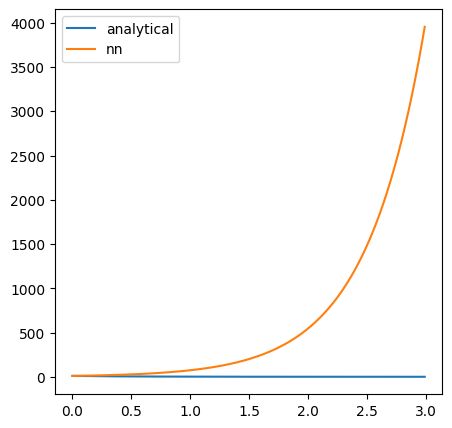

In [34]:
t = np.arange(0, 3, 0.01)
def analytic(input, gamma=2, g0=10):
    return g0 * np.exp(gamma * input)

res_analytical = analytic(t)
res = trial_solution(t, parameters, initial_conditions)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(t, res[0])
ax.plot(t, res_analytical)
plt.legend(["analytical", "nn"])

In [17]:
print(res)

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan]]
